In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import numpy as np
import cv2

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras.models import model_from_json
from keras import backend as K

K.set_image_data_format('channels_first')

from IPython.display import Image

In [ ]:
json_file = open('/content/drive/MyDrive/Colab Notebooks/CV+DL+ML-Ops Project/model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

#Loading saved weights into new model
loaded_model.load_weights("/content/drive/MyDrive/Colab Notebooks/CV+DL+ML-Ops Project/model.h5")

In [ ]:
img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/CV+DL+ML-Ops Project/Test Image.jpeg',cv2.IMREAD_GRAYSCALE)

cv2.waitKey(0)
cv2.destroyAllWindows()

if img is not None:
    img =~ img
    ret, thresh = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
    
    ctrs, ret = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    
    cnt=sorted(ctrs, key=lambda ctr: cv2.boundingRect(ctr)[0])
    w = int(28)
    h = int(28)
    train_data = []
    
    rects = []
    
    for c in cnt:
        x, y, w, h = cv2.boundingRect(c)
        rect = [x, y, w, h]
        rects.append(rect)
    
    bool_rect = []
    for r in rects:
        l = []
        for rec in rects:
            flag = 0
            
            if (rec!=r):
                if (r[0]<(rec[0]+rec[2]+10) and rec[0]<(r[0]+r[2]+10) and r[1]<(rec[1]+rec[3]+10) and rec[1]<(r[1]+r[3]+10)):
                    flag = 1
                l.append(flag)
            
            if (rec == r):
                l.append(0)
        
        bool_rect.append(l)
    
    dump_rect = []
    
    for i in range(0,len(cnt)):
        for j in range(0,len(cnt)):
            if bool_rect[i][j] == 1:
                area1 = rects[i][2]*rects[i][3]
                area2 = rects[j][2]*rects[j][3]
                if(area1 == min(area1,area2)):
                    dump_rect.append(rects[i])

    final_rect=[i for i in rects if i not in dump_rect]
    
    for r in final_rect:
        x = r[0]
        y = r[1]
        w = r[2]
        h = r[3]
        im_crop = thresh[y:y+h+10,x:x+w+10]
        
        im_resize = cv2.resize(im_crop,(28,28))
        cv2.waitKey(0)
        cv2.destroyAllWindows()

        im_resize=np.reshape(im_resize,(1,28,28,1))
        train_data.append(im_resize)



 The test image --> 




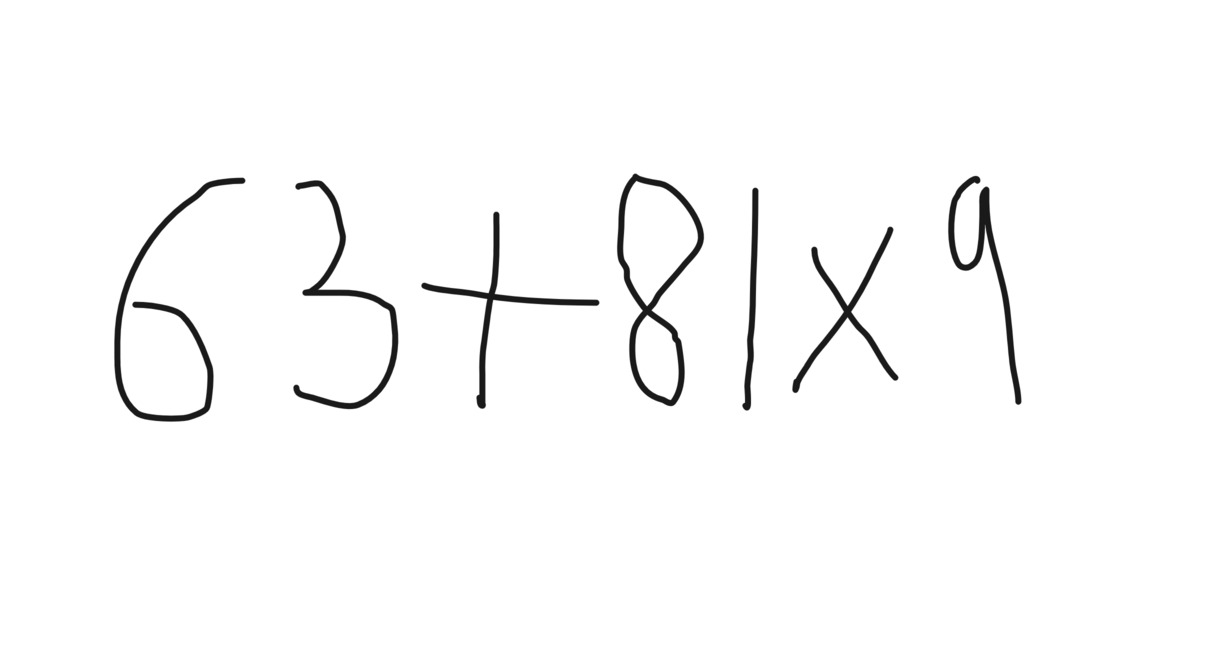

In [ ]:
print("\n"*2, "The test image -->", "\n"*2)

Image('/content/drive/MyDrive/Colab Notebooks/CV+DL+ML-Ops Project/Test Image.jpeg')

In [ ]:
s = ''

for i in range(len(train_data)):
    train_data[i]=np.array(train_data[i])
    train_data[i]=train_data[i].reshape(1,1,28,28)

    result = (loaded_model.predict(train_data[i]) > 0.5).astype("int32")
    
    if(result[0][0]==1):
        s=s+'0'
    
    if(result[0][1]==1):
        s=s+'1'
    
    if(result[0][2]==1):
        s=s+'2'
    
    if(result[0][3]==1):
        s=s+'3'
    
    if(result[0][4]==1):
        s=s+'4'
    
    if(result[0][5]==1):
        s=s+'5'
    
    if(result[0][6]==1):
        s=s+'6'
    
    if(result[0][7]==1):
        s=s+'7'
    
    if(result[0][8]==1):
        s=s+'8'
    
    if(result[0][9]==1):
        s=s+'9'
    
    if(result[0][10]==1):
        s=s+'-'
    
    if(result[0][11]==1):
        s=s+'+'
    
    if(result[0][12]==1):
        s=s+'*'
    
print("\n"*2, "The evaluation of the image gives equation : ", s, "\n"*2)



 The evaluation of the image gives equation :  63+81*9 




In [ ]:
print("\n"*2, "The evaluation of the image gives --> ", s, " = ", eval(s), "\n"*2)



 The evaluation of the image gives -->  63+81*9  =  792 


